In [1]:
import tensorflow as tf
import numpy as np

import sys
sys.path.append('../')


import models
from utils import iou, convert_cellbox_to_corner_bbox, convert_cellbox_to_xywh, iou
from loss import YoloLoss
import dataset


input_shape = (448, 448, 3)
seed = 42

In [2]:
train_df = dataset.get_dataframe('../fruits_dataset/train')
train_dataset = dataset.load_dataset_from_df(train_df, num_epochs=1, batch_size=1, seed=seed)

23it [00:00, 57.78it/s]/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
240it [00:05, 44.57it/s]


In [3]:
first_batch = next(iter(train_dataset))
batch_input = first_batch[0]
batch_target = first_batch[1]

In [4]:
yolo = models.YoloV1(input_shape=input_shape, num_classes=3)
yolo_loss = YoloLoss()
yolo.build(input_shape=batch_input.shape)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [5]:
yolo.load_weights('../yolo_best_weights.hdf5')

In [6]:
boxes, scores, classes, nums = yolo(batch_input)

In [7]:
box = boxes[0, 0]

In [8]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
img = Image.open('../fruits_dataset/train/apple_1.jpg')

In [16]:
xmin = int(box[1] * img.width)
ymin = int(box[0] * img.height)
xmax = int(box[3] * img.width)
ymax = int(box[2] * img.height)

In [17]:
img_rec = cv2.rectangle(np.array(img), (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)

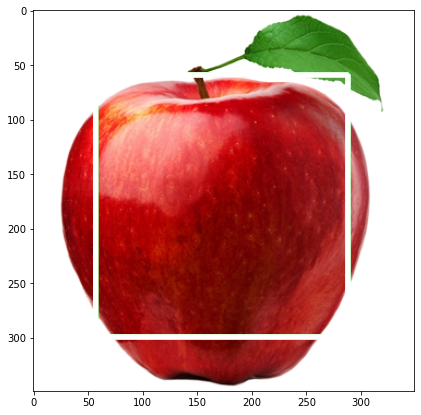

In [18]:
plt.figure(figsize=(8, 7))
plt.imshow(img_rec)